In [41]:
import tensorflow as tf
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [52]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


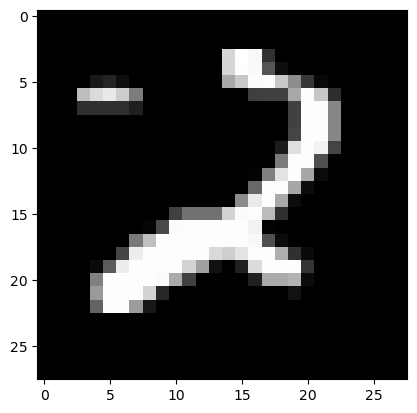

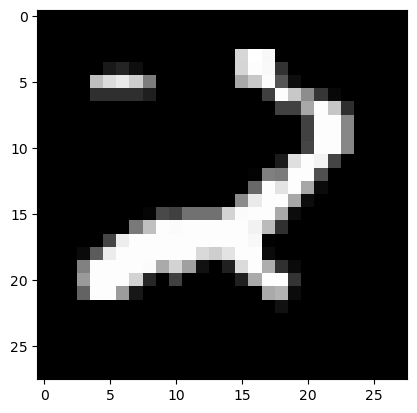

In [53]:
%run prepro.ipynb

In [104]:

tf.keras.backend.clear_session()
model = tf.keras.Sequential(
    [
        tf.keras.layers.GaussianNoise(0.1, input_shape=(28, 28, 1)),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2), strides=2),
        tf.keras.layers.SpatialDropout2D(0.4),
        tf.keras.layers.Conv2D(48, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2), strides=2),
        tf.keras.layers.SpatialDropout2D(0.4),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax")
    ]
)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [105]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gaussian_noise (GaussianNoi  (None, 28, 28, 1)        0         
 se)                                                             
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 spatial_dropout2d (SpatialD  (None, 13, 13, 32)       0         
 ropout2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 48)        13872     
                                                        

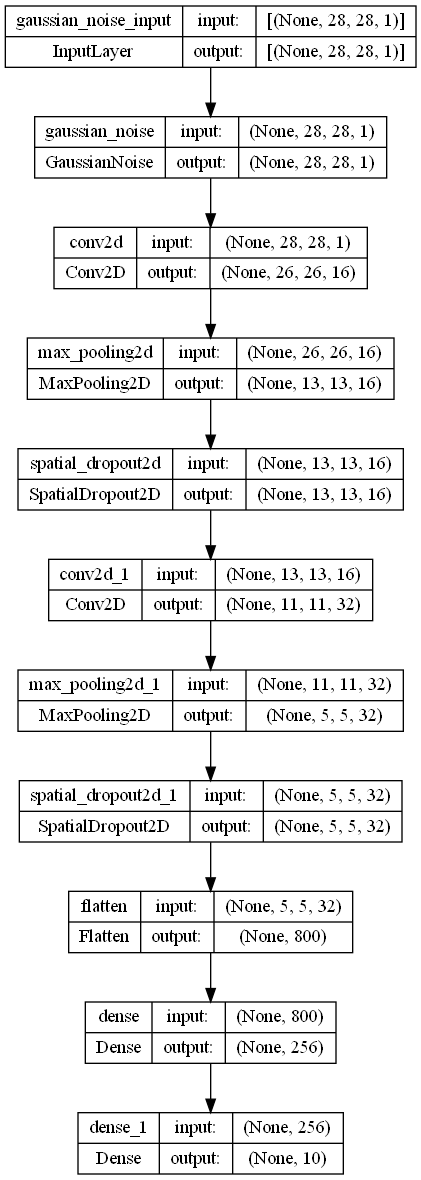

In [96]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [106]:
history = model.fit(x_train,y_train,batch_size=100,epochs=20,validation_split=0.2)

Epoch 1/20
605/605 [==============================] - 4s 5ms/step - loss: 0.3780 - accuracy: 0.8833 - val_loss: 0.1813 - val_accuracy: 0.9411
Epoch 2/20
605/605 [==============================] - 3s 5ms/step - loss: 0.1357 - accuracy: 0.9584 - val_loss: 0.1189 - val_accuracy: 0.9614
Epoch 3/20
605/605 [==============================] - 3s 5ms/step - loss: 0.1023 - accuracy: 0.9688 - val_loss: 0.0964 - val_accuracy: 0.9696
Epoch 4/20
605/605 [==============================] - 3s 5ms/step - loss: 0.0818 - accuracy: 0.9753 - val_loss: 0.0929 - val_accuracy: 0.9702
Epoch 5/20
605/605 [==============================] - 3s 5ms/step - loss: 0.0711 - accuracy: 0.9782 - val_loss: 0.0759 - val_accuracy: 0.9749
Epoch 6/20
605/605 [==============================] - 3s 5ms/step - loss: 0.0623 - accuracy: 0.9803 - val_loss: 0.0747 - val_accuracy: 0.9770
Epoch 7/20
605/605 [==============================] - 3s 4ms/step - loss: 0.0565 - accuracy: 0.9819 - val_loss: 0.0684 - val_accuracy: 0.9776
Epoch 

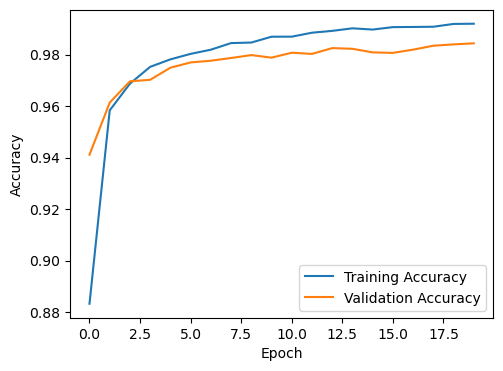

In [107]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [108]:
model.evaluate(x_test,y_test)

132/132 [==============================] - 1s 2ms/step - loss: 0.0415 - accuracy: 0.9905


[0.04149451106786728, 0.9904761910438538]

In [75]:
encoder.inverse_transform(y_test)

array([[8],
       [3],
       [6],
       ...,
       [2],
       [8],
       [9]], dtype=int64)

In [76]:
prediction = encoder.inverse_transform(model.predict(x_test))


132/132 [==============================] - 0s 2ms/step


In [80]:
indices = np.where((prediction==encoder.inverse_transform(y_test))==False)[0]

In [81]:
prediction[indices]

array([[3],
       [6],
       [8],
       [9],
       [0],
       [8],
       [3],
       [3],
       [9],
       [8],
       [2],
       [9],
       [8],
       [8],
       [8],
       [9],
       [2],
       [7],
       [7],
       [6],
       [9],
       [9],
       [7],
       [4],
       [7],
       [8],
       [2],
       [7],
       [7],
       [3],
       [9],
       [0],
       [2],
       [8],
       [5],
       [6],
       [6],
       [7],
       [1],
       [7],
       [8],
       [6],
       [3],
       [7],
       [6],
       [9],
       [3],
       [8],
       [7],
       [5],
       [6],
       [7]], dtype=int64)

In [82]:
encoder.inverse_transform(y_test)[indices]

array([[5],
       [5],
       [7],
       [4],
       [9],
       [2],
       [5],
       [1],
       [4],
       [2],
       [7],
       [4],
       [2],
       [3],
       [9],
       [8],
       [3],
       [3],
       [2],
       [5],
       [4],
       [4],
       [2],
       [9],
       [2],
       [9],
       [1],
       [1],
       [4],
       [5],
       [4],
       [9],
       [3],
       [9],
       [8],
       [8],
       [0],
       [9],
       [8],
       [9],
       [2],
       [5],
       [7],
       [3],
       [5],
       [8],
       [2],
       [9],
       [3],
       [3],
       [5],
       [2]], dtype=int64)

In [ ]:
for idx in indices:
    fig = plt.figure(figsize=(2, 2))
    plt.imshow(x_test[idx], cmap='gray')
    plt.show()

In [109]:
sub_prediction = model.predict(test_data.to_numpy().reshape(-1, 28, 28, 1)/255.0)
sub_prediction = encoder.inverse_transform(sub_prediction)
sub_prediction

875/875 [==============================] - 2s 2ms/step


array([[2],
       [0],
       [9],
       ...,
       [3],
       [9],
       [2]], dtype=int64)

In [110]:
sub = pd.DataFrame.from_dict({'ImageId':test_data.index.to_numpy()+1, 'Label':sub_prediction.ravel()})

In [111]:
sub.to_csv("../resources/test_submission.csv",columns=["ImageId","Label"],index=False)